LAB 2

In [46]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [62]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [64]:
#Id вина нам не нужен так как оно никак не влияет на его качество
data = data.drop(columns='Id')

In [65]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


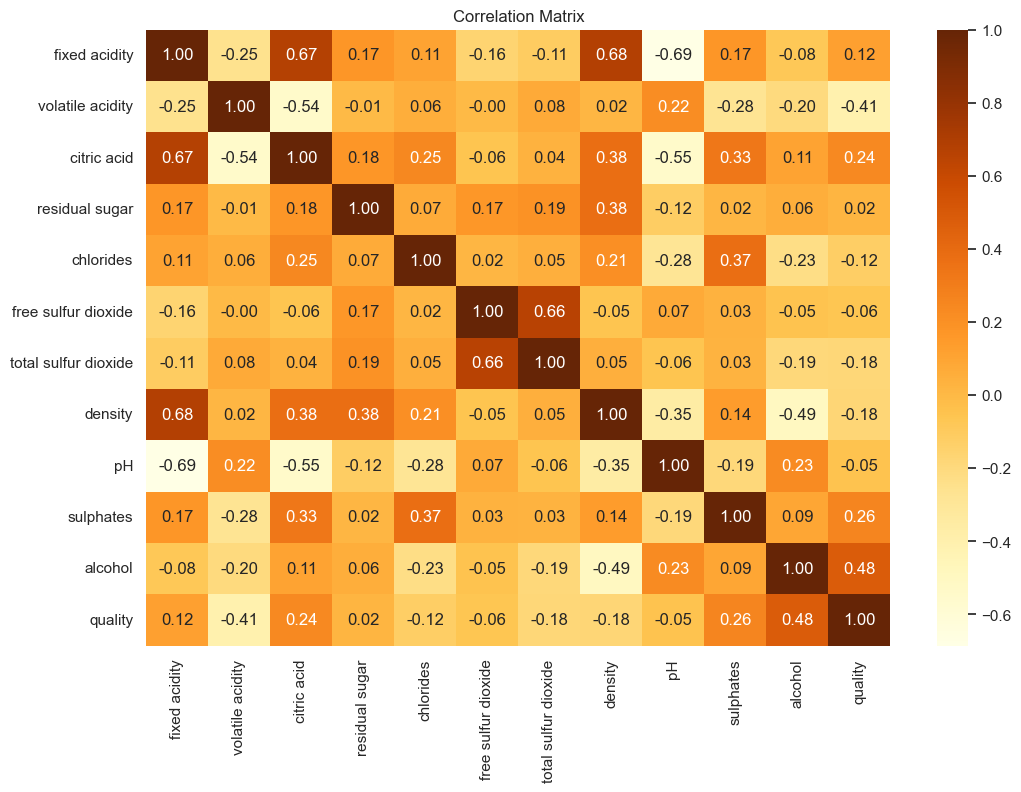

In [97]:
#посмотрим на корреляцию признаков между собой
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

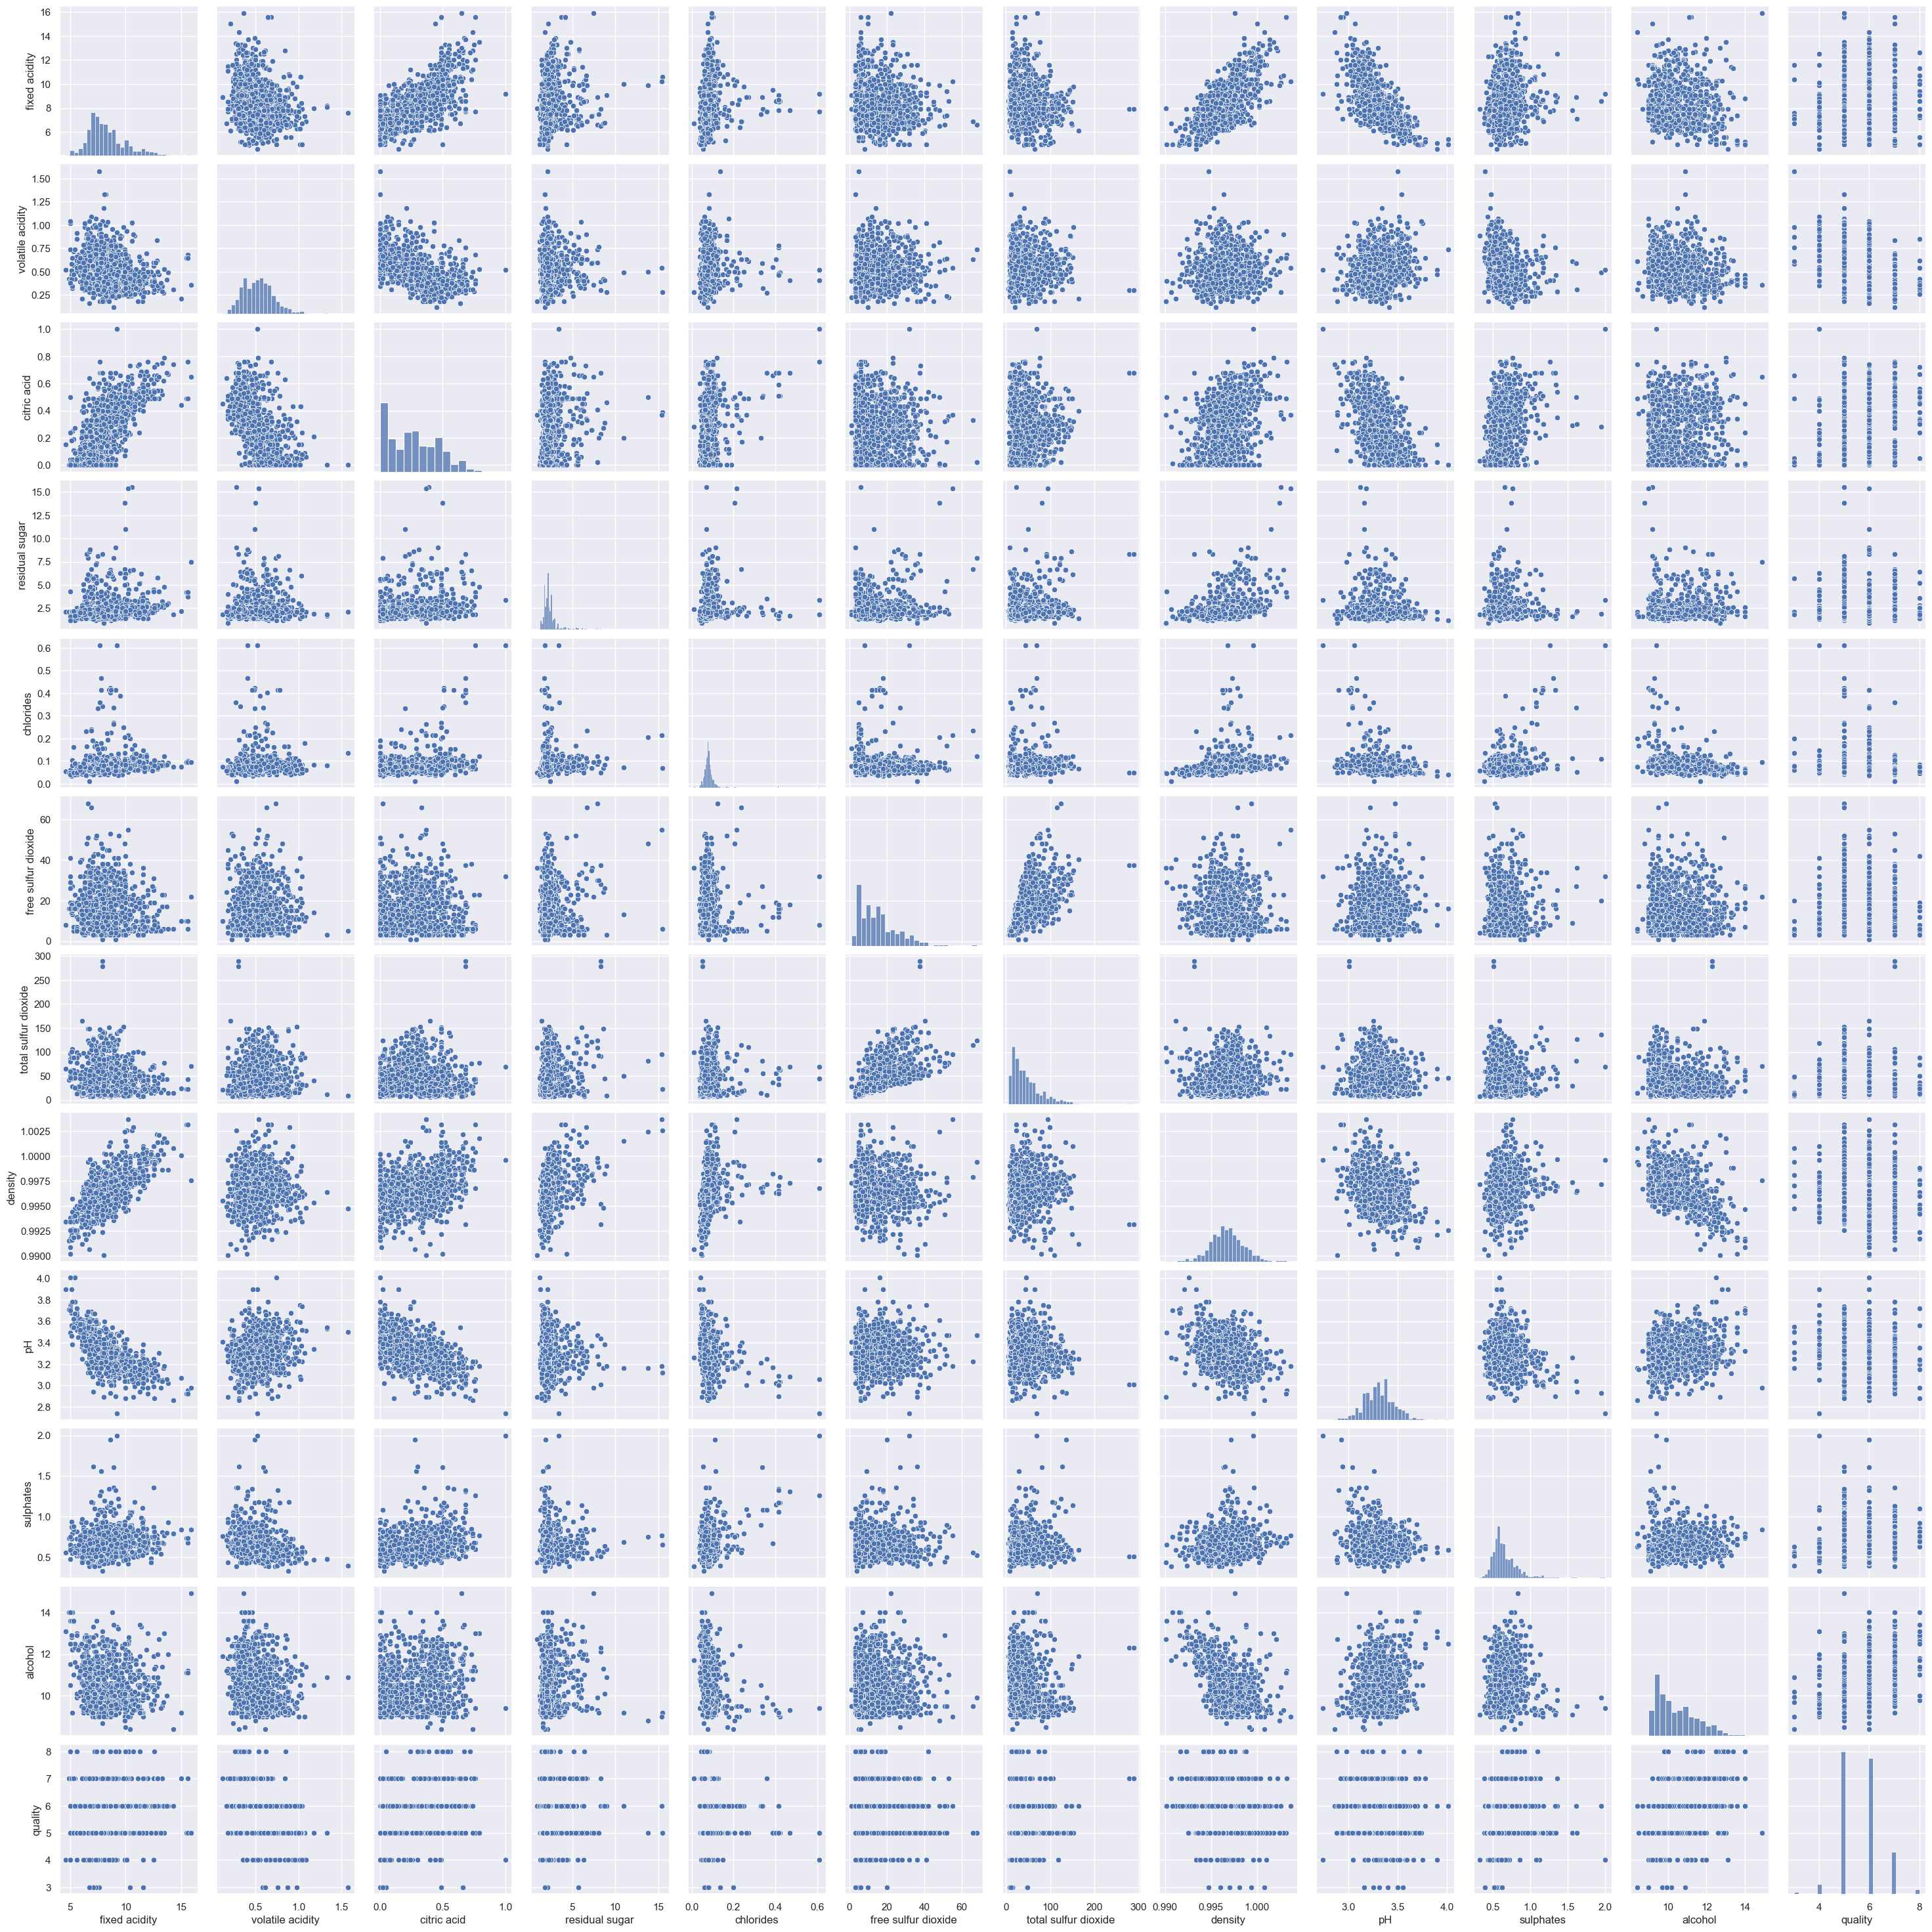

In [100]:
#посмотрим на распределенние признаков относительно друг друга
sns.pairplot(data)
plt.show()

In [67]:
#проверим наличие пустых значений (Nan-ов)
data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [69]:
X = data[data.columns[:-1]]
y = data['quality']

from sklearn.model_selection import train_test_split

#отправим на тест 30% датасета
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [86]:
#нормализуем данные
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [94]:
#модели, которыми будем пользоваться для обучения
models = {
    "KNN" : KNeighborsClassifier(n_neighbors=4), "LogisticRegression": LogisticRegression(),"DecisionTree":DecisionTreeClassifier(),"RandomForest":RandomForestClassifier()
}

In [93]:
#обучение и проверка точности
for name, models in models.items():
    models.fit(X_train_sc, y_train)
    predicitions = models.predict(X_test_sc)
    accuracy = accuracy_score(y_test,predicitions)
    print("Accuracy score for",name,":",accuracy)

Accuracy score for KNN : 0.5451895043731778
Accuracy score for LogisticRegression : 0.6180758017492711
Accuracy score for DecisionTree : 0.5801749271137027
Accuracy score for RandomForest : 0.6997084548104956
